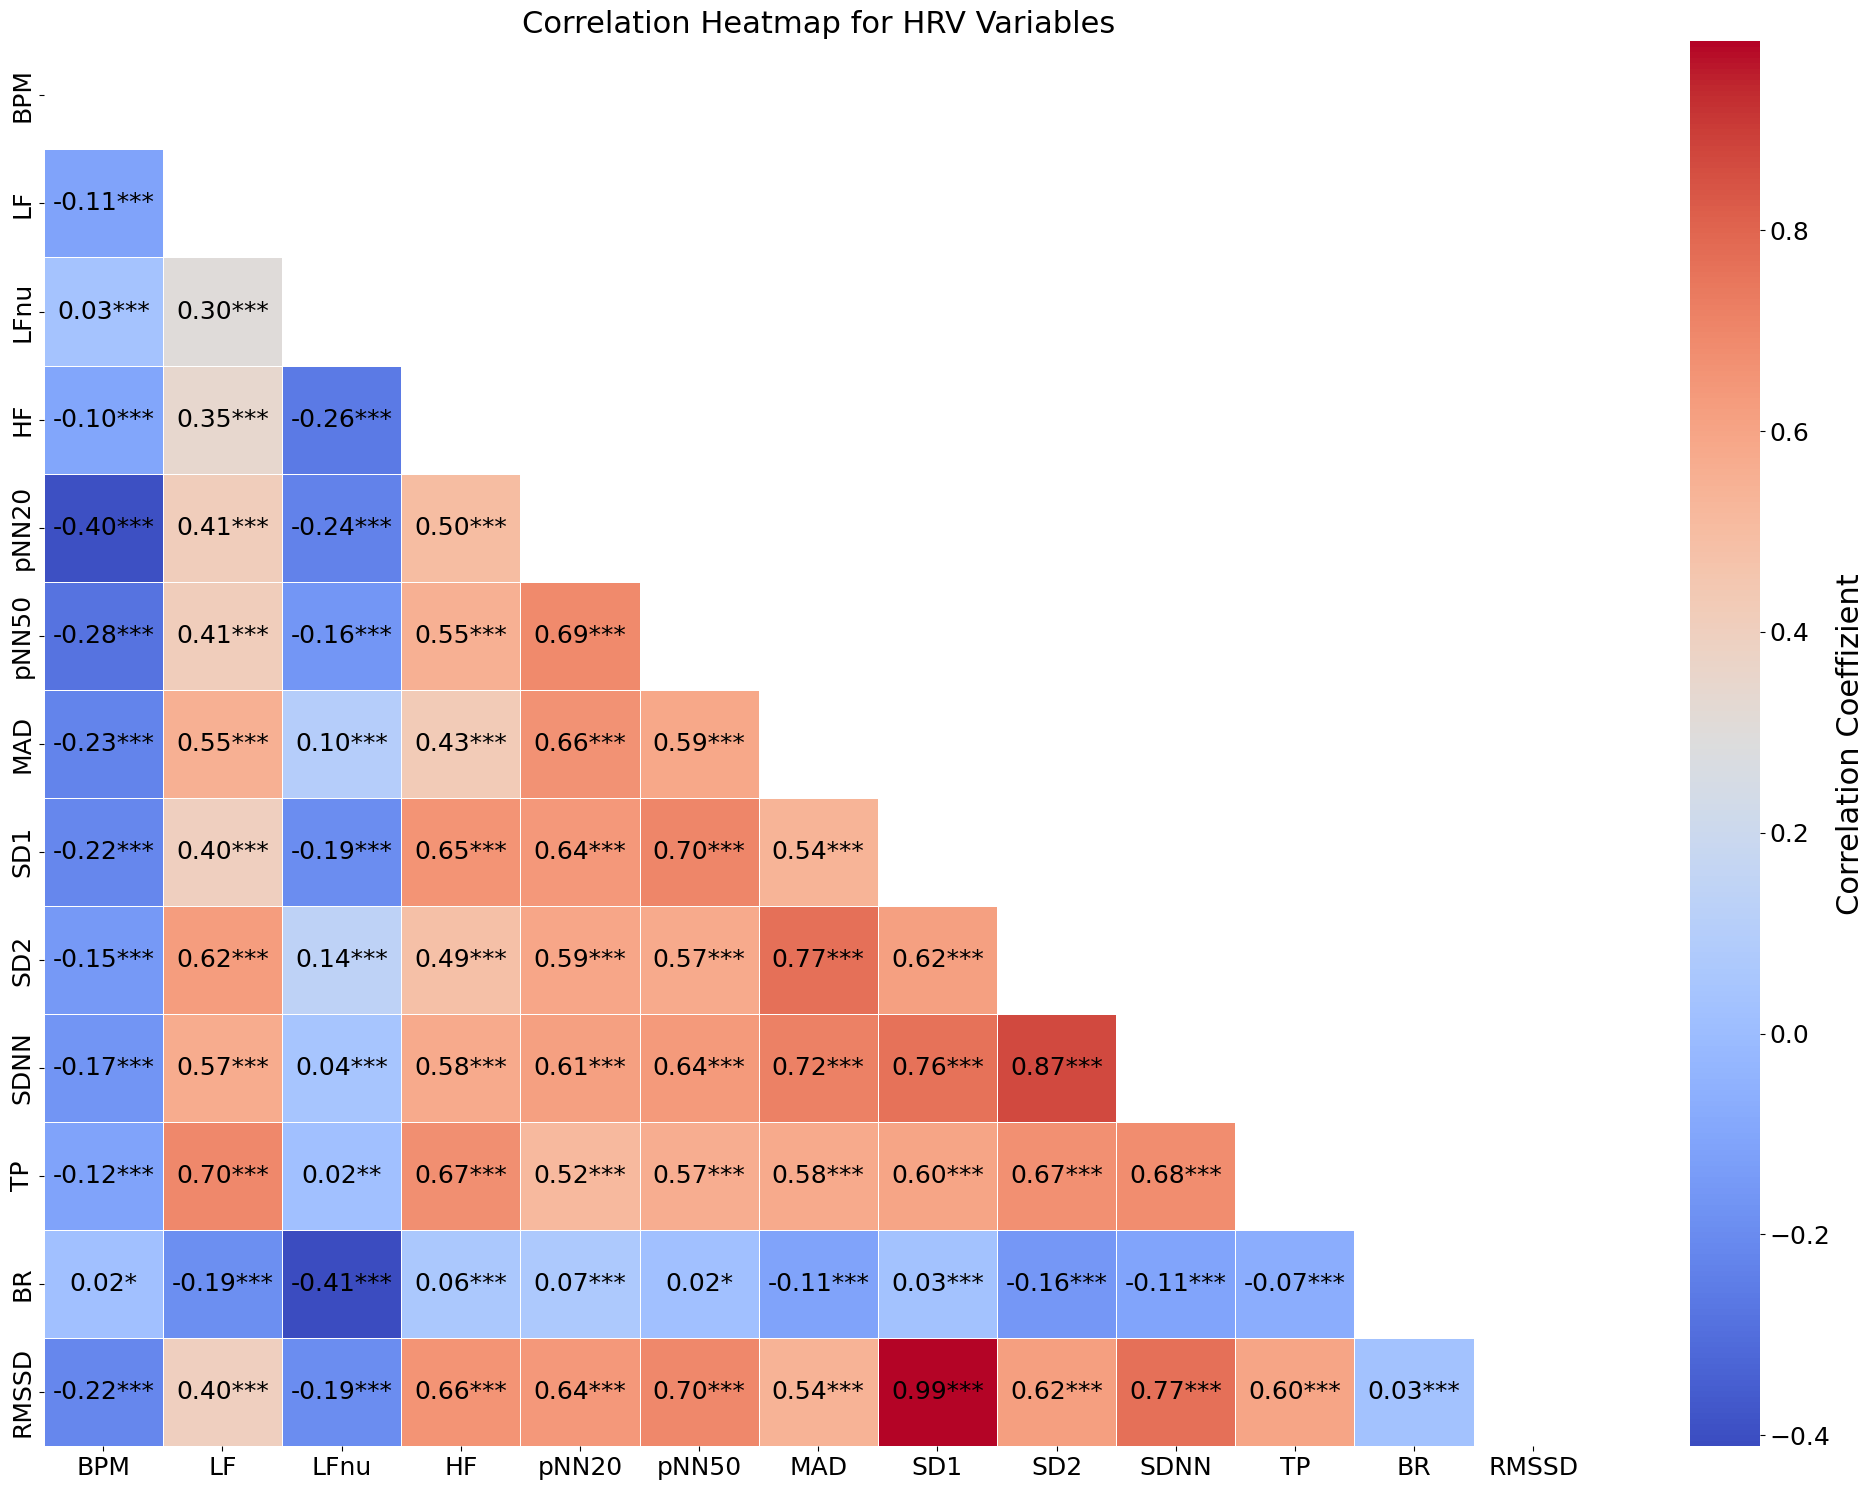

In [25]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr

warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv('short4python_clustering.csv')

numerical_variables = [ 'BPM', 'LF', 'LFnu',  'HF', 'pNN20', 'pNN50', 'MAD', 'SD1','SD2', 'SDNN',   'TP', 'BR', 'RMSSD']
num_imputer = SimpleImputer(strategy='mean')
df[numerical_variables] = num_imputer.fit_transform(df[numerical_variables])

correlation_matrix_group3 = df[numerical_variables].corr()

def berechne_p_werte(df, variablen):
    p_werte = pd.DataFrame(index=variablen, columns=variablen)
    for var1 in variablen:
        for var2 in variablen:
            # p-Wert = NaN für die Diagonale
            if var1 == var2:
                p_werte.loc[var1, var2] = np.nan
            else:
                _, p = pearsonr(df[var1], df[var2])
                p_werte.loc[var1, var2] = p
    return p_werte

p_werte_matrix = berechne_p_werte(df, numerical_variables)

def signifikanz_sterne(p):
    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    else:
        return ''

# Anwenden der signifikanz_sterne Funktion auf die p-Werte Matrix
sternchen_matrix = p_werte_matrix.applymap(signifikanz_sterne)

# Ignoriere die Diagonale
np.fill_diagonal(sternchen_matrix.values, '')

# Maske für das obere Dreieck 
mask = np.triu(np.ones_like(correlation_matrix_group3, dtype=bool))

# Plot erstellen ohne Annotationen
plt.figure(figsize=(20, 15))
ax = sns.heatmap(correlation_matrix_group3, mask=mask, cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Correlation coeffizient'}, annot=False)

# Schriftgrad in der Heatmap
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18) 

# Werte und Sternchen in die Zellen der Heatmap einfügen
for i in range(correlation_matrix_group3.shape[0]):
    for j in range(correlation_matrix_group3.shape[1]):
        if not mask[i, j]:
            if not np.isnan(p_werte_matrix.iloc[i, j]):
                text = f'{correlation_matrix_group3.iloc[i, j]:.2f}{sternchen_matrix.iloc[i, j]}'
                ax.text(j+0.5, i+0.5, text, ha='center', va='center', fontsize=18)  


cbar = ax.collections[0].colorbar
cbar.set_label('Correlation Coeffizient', fontsize=22)  
cbar.ax.tick_params(labelsize=18)  

plt.title('Correlation Heatmap for HRV Variables', fontsize=22)  
plt.tight_layout()
# Plot als PNG-Datei
plt.savefig('heatmap_complete.png')
plt.show()

In [2]:
print(p_werte_matrix)


            BPM   LF      LFnu   HF pNN20     pNN50  MAD       SD1  SD2 SDNN  \
BPM         NaN  0.0  0.000029  0.0   0.0       0.0  0.0       0.0  0.0  0.0   
LF          0.0  NaN       0.0  0.0   0.0       0.0  0.0       0.0  0.0  0.0   
LFnu   0.000029  0.0       NaN  0.0   0.0       0.0  0.0       0.0  0.0  0.0   
HF          0.0  0.0       0.0  NaN   0.0       0.0  0.0       0.0  0.0  0.0   
pNN20       0.0  0.0       0.0  0.0   NaN       0.0  0.0       0.0  0.0  0.0   
pNN50       0.0  0.0       0.0  0.0   0.0       NaN  0.0       0.0  0.0  0.0   
MAD         0.0  0.0       0.0  0.0   0.0       0.0  NaN       0.0  0.0  0.0   
SD1         0.0  0.0       0.0  0.0   0.0       0.0  0.0       NaN  0.0  0.0   
SD2         0.0  0.0       0.0  0.0   0.0       0.0  0.0       0.0  NaN  0.0   
SDNN        0.0  0.0       0.0  0.0   0.0       0.0  0.0       0.0  0.0  NaN   
TP          0.0  0.0  0.009318  0.0   0.0       0.0  0.0       0.0  0.0  0.0   
BR     0.032203  0.0       0.0  0.0   0.

#### Erzeuge eine kombinierte DataFrame aus Korrelationen und Signifikanzsternen
combined_matrix = correlation_matrix_group3.astype(str) + '\n' + sternchen_matrix.fillna('')

# Print die kombinierte DataFrame
print(combined_matrix)


In [32]:
print(sternchen_matrix)

                z_bmp_calc z_lf z_lf_nu z_hf z_pnn20 z_pnn50 z_hr_mad z_sd1  \
z_bmp_calc                  ***     ***  ***     ***     ***      ***   ***   
z_lf                   ***          ***  ***     ***     ***      ***   ***   
z_lf_nu                ***  ***          ***     ***     ***      ***   ***   
z_hf                   ***  ***     ***          ***     ***      ***   ***   
z_pnn20                ***  ***     ***  ***             ***      ***   ***   
z_pnn50                ***  ***     ***  ***     ***              ***   ***   
z_hr_mad               ***  ***     ***  ***     ***     ***            ***   
z_sd1                  ***  ***     ***  ***     ***     ***      ***         
z_sd2                  ***  ***     ***  ***     ***     ***      ***   ***   
z_sdnn                 ***  ***     ***  ***     ***     ***      ***   ***   
z_p_total              ***  ***      **  ***     ***     ***      ***   ***   
z_breathingrate          *  ***     ***  ***     ***

In [ ]:
#SDNN, SD1 und SD2 raus. restliche je nach assoziationen mit outcome oder mind. mit "recent depression" oder "loss of energy"